<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [99]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df1 = pd.read_csv("data/yearly_deaths_by_clinic.csv")
df2 = pd.read_csv("data/monthly_deaths.csv")

print(df1.head())
print(df2.head())
print(f"\nDf1 and Df2 Missing Values: {df1.isna().sum().sum()} and {df2.isna().sum().sum()}")
print(f"\nDf1 and Df2 Data Types: \n \n{df1.dtypes} \n \n{df2.dtypes}")

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2

Df1 and Df2 Missing Values: 0 and 0

Df1 and Df2 Data Types: 
 
year       int64
births     int64
deaths     int64
clinic    object
dtype: object 
 
date      object
births     int64
deaths     int64
dtype: object


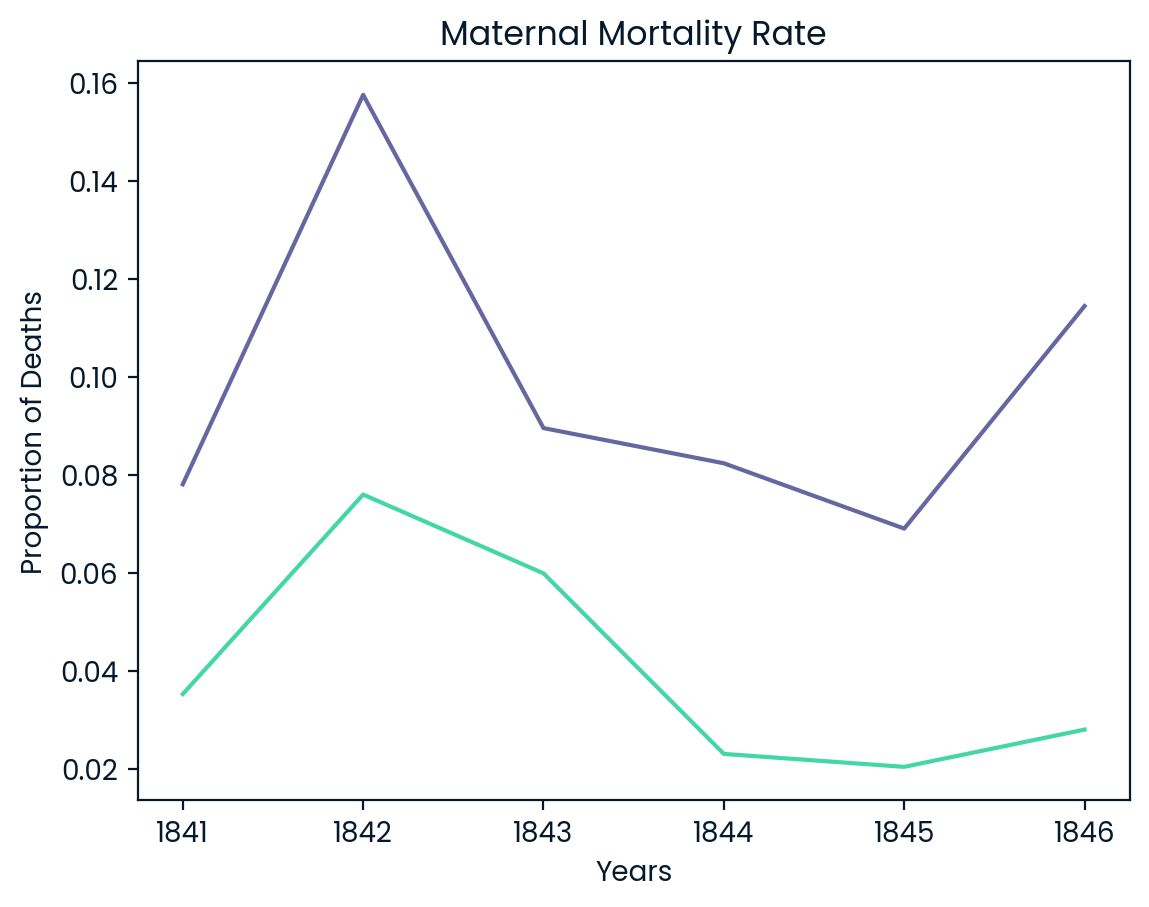

Year w/ Highest Mortality at Clinic 1: 1842
Year w/ Highest Mortality at Clinic 2: 1842


In [100]:
#What year had the highest yearly proportion of deaths at each clinic? Visualize the data and store the answer as an integer variable highest_year.
df1['prop_deaths'] = df1['deaths'] / df1['births']
clinic_1 = df1[df1['clinic'] == 'clinic 1']
clinic_2 = df1[df1['clinic'] == 'clinic 2']

idx_max_1 = clinic_1['prop_deaths'].idxmax()
idx_max_2 = clinic_2['prop_deaths'].idxmax()

year_1 = int(clinic_1.loc[idx_max_1,'year'])
year_2 = int(clinic_2.loc[idx_max_2,'year'])

highest_year = max(year_1,year_2)

plt.plot(clinic_1['year'],clinic_1['prop_deaths'], label='Clinic 1')
plt.plot(clinic_2['year'],clinic_2['prop_deaths'], label='Clinic 2')
plt.xlabel('Years')
plt.ylabel('Proportion of Deaths')
plt.title('Maternal Mortality Rate')
plt.show()

print(f"Year w/ Highest Mortality at Clinic 1: {year_1}")
print(f"Year w/ Highest Mortality at Clinic 2: {year_2}")

In [101]:
#Handwashing was introduced on June 1st, 1847. What are the mean proportions of deaths before and after handwashing from the monthly data? Store the result as a 2x2 DataFrame named monthly_summary with the first column, handwashing_started, being a boolean flag and the second column having the mean proportion of deaths.
df2['date'] = pd.to_datetime(df2['date'])
df2['prop_deaths'] = df2['deaths'] / df2['births']

handwashing_start = pd.Timestamp('1847-06-01')
monthly_summary = (
    df2.assign(handwashing_started=df2['date'] > handwashing_start)
    .groupby('handwashing_started')['prop_deaths']
    .mean().reset_index()
)
print(monthly_summary)


   handwashing_started  prop_deaths
0                False     0.103976
1                 True     0.021032


In [102]:
#Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series confidence_interval.
before = df2.loc[df2['date'] < handwashing_start, 'prop_deaths']
after = df2.loc[df2['date'] > handwashing_start, 'prop_deaths']
diff_mean = before.mean() - after.mean()
print(f"Difference in Mean Proportion: {round(diff_mean * 100,2)}%")

n_sample = 10000
bootstrap_diff = []

for i in range(n_sample):
    sample_before = before.sample(frac=1, replace=True)
    sample_after = after.sample(frac=1, replace=True)

    bootstrap_diff.append(sample_after.mean() - sample_before.mean())

bootstrap_diff = np.array(bootstrap_diff)

lower, upper = np.percentile(bootstrap_diff, [2.5, 97.5])

confidence_interval = pd.Series([lower, upper], index=['lower','upper'])
print(confidence_interval)

Difference in Mean Proportion: 8.4%
lower   -0.101144
upper   -0.066916
dtype: float64
